#Adam Moulton
Método diferencia finitas centradas para aproximación numérica de ecuaciones diferenciales 

In [22]:
import math
from math import cos, sin, e, log
import numpy as np
import pandas as pd
import sympy as sp
from sympy import * 
import matplotlib.pyplot as plt
import scipy as sip
from scipy import integrate
from scipy.sparse import spdiags

**Sistema de Ecuaciones**
$\left\{ \begin{array}{lcc}
             y_1'= 9y_1+24y_2+5cost-\frac{1}{3}sint & t\in [0,1] 
             \\ y_2'= -24y_1-51y_2-9cost+\frac{1}{3}sint & t \in [0,1] 
             \\ y_1(0)= \frac{4}{3}, \;\;\; y_2(0)=\frac{2}{3} 
             \end{array}
   \right.$

In [23]:
##Sistema de ecuaciones
def function1(t, y1, y2):
  return 9*y1+24*y2+5*cos(t)-1/3*sin(t)
def function2(t, y1, y2):
  return -24*y1-51*y2-9*cos(t)+1/3*sin(t)

**Solución al PVI** $\left\{ \begin{array}{lcc}
             y_1 = 2e^{-3t}-e^{-39t}+\frac{1}{3}cos(t) & t\in [0,1] 
             \\ y_2= -e^{-3t}+2e^{-39t}-\frac{1}{3}cos(t) & t \in [0,1] 
             \end{array}
   \right.$

In [5]:
#Soluciones
def sol1(t):
  return 2*e**(-3*t)-e**(-39*t)+(1/3)*cos(t)
def sol2(t):
  return (-1)*e**(-3*t)+2*e**(-39*t)-(1/3)*cos(t)
def sol3(x,ep):
  return 1+x+(e**(x/ep)-1)/(e**(1/ep)-1)

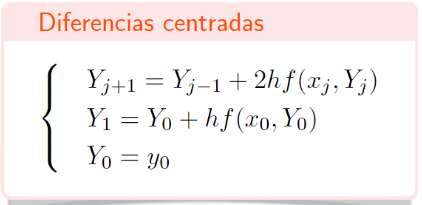

In [63]:
##DIFERENCIAS FINITAS EDO
def DFinitas(a,b,u0,un,ep,M):
  h=(b-a)/M
  X=np.zeros(M+1)
  A=np.zeros((M-1,M-1))
  c=np.zeros(M-1)
  d=np.zeros(M-1)
  de=np.zeros(M-2)
  db=np.zeros(M-2)
  ljj= -2
  ljj_1= 1-(h/(2*ep)) 
  lj1j= 1+(h/(2*ep))
  fj= -(h**2/ep)
  X[0]=a
  c[0]= fj-lj1j
  c[M-2]=fj-un*ljj_1
  c[1:M-2]= fj
  U=np.zeros(M+1)
  U[0]=u0
  U[M]=un

  for i in range(M-1):
    d[i]= ljj
  for j in range(M-2):
    de[j]= ljj_1
    db[j]= lj1j
  for i in range(M):
    X[i+1]= X[i]+h

  Error = np.zeros(M+1)
  Datos = []
  matriz= np.diag(d) + np.diag(de, 1) + np.diag(db, -1)
  d= np.linalg.solve(matriz,c)
  for i in range(M-1):
    U[i+1]=d[i]
  for i in range(M+1):
    Error[i] = abs(U[i]-sol3(X[i],ep))
    Datos.append([X[i],U[i],Error[i], sol3(X[i],ep)])
  Datos = pd.DataFrame(Datos).set_axis(['X','U aprox','Error', 'U'], axis=1)
  return X, U

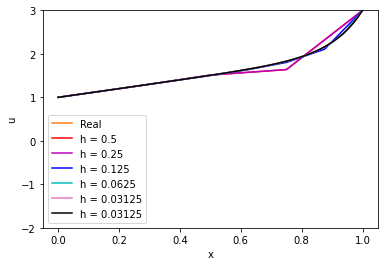

In [65]:
#Gráficar

#Solución real:

x = np.linspace(0,1,1000)
yreal = np.zeros(len(x))
Xp, Y1p= DFinitas(0,1,1,3,0.1,4)
Xs, Y1s= DFinitas(0,1,1,3,0.1,4)
Xt, Y1t= DFinitas(0,1,1,3,0.1,8)
Xc, Y1c= DFinitas(0,1,1,3,0.1,16)
Xq, Y1q = DFinitas(0,1,1,3,0.1,32)
Xo, Y1o= DFinitas(0,1,1,3,0.1,64)

for i in range(len(x)):
  yreal[i] = sol3(x[i],0.1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


# plot the function
plt.plot(x,yreal, 'C1')
plt.xlabel('x')
plt.ylabel('u')
plt.plot(Xp,Y1p, 'r')
plt.plot(Xs,Y1s, 'm')
plt.plot(Xt,Y1t, 'b')
plt.plot(Xc,Y1c, 'c')
plt.plot(Xq,Y1q, 'C6')
plt.plot(Xo,Y1o, 'k')
plt.ylim(top = 3, bottom = -2)
plt.legend(["Real", "h = "+ str(2**(-1)), "h = "+ str(2**(-2)), "h = "+ str(2**(-3)), "h = "+ str(2**(-4)),"h = "+ str(2**(-5)) ,"h = "+ str(2**(-5))], loc ="lower left")
  

plt.show()

In [67]:
def errorDiff(a,b,u0,un,ep,M):
  X, U = DFinitas(a,b,u0,un,ep,M)
  h=(b-a)/M
  error = 0
  for i in range(1,M+1):
    l1i = lambda x: U[i-1]+((x-X[i-1])/h)*(U[i]-U[i-1])
    integrando = lambda x: (sol3(x,ep)-l1i(x))**2
    integral= integrate.quad(integrando, X[i-1], X[i])
    
    error = error + integral[0]
  error = sqrt(error)
  return error

In [69]:
def alpha():
  Errorh = np.zeros(6)
  hs = np.zeros(6)
  alphas = np.zeros(6)
  Datos = []
  M = 2
  Errorh[0] = errorDiff(0,1,1,3,0.1,M)
  hs[0] = 1/M
  Datos.append([hs[0],Errorh[0],nan])
  for i in range(1,6):
    M=M*2
    h = 1/M
    Errorh[i] = errorDiff(0,1,1,3,0.1,M)
    hs[i] = h
    alphas[i] = log(Errorh[i]/Errorh[i-1])/log(hs[i]/hs[i-1])
    Datos.append([hs[i],Errorh[i],alphas[i]])
  Datos = pd.DataFrame(Datos).set_axis(['h','Eh','alpha'], axis=1) 
  return Datos,Errorh, hs

In [70]:
Datos, errorh, hs = alpha()
Datos

,h,Eh,alpha
0,0.500000,1.349675,nan
1,0.250000,0.083071,4.022119
2,0.125000,0.023282,1.835131
3,0.062500,0.006018,1.951903
4,0.031250,0.001518,1.987448
5,0.015625,0.000380,1.996827


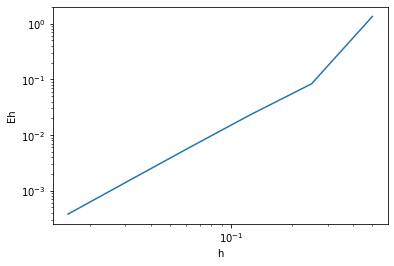

In [71]:
##Gráficas loglog
plt.loglog(hs,errorh)
plt.xlabel('h')
plt.ylabel('Eh')
plt.show()